In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd

In [4]:
# 데이터 불러오기
yf.pdr_override()

In [5]:
# 나스닥 지수 심볼 IXIC
nasdaq = pdr.get_data_yahoo('^IXIC', start='2022-01-01')
nasdaq.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,15722.910156,15777.429688,15643.940430,15644.969727,15644.969727,3379850000
2022-01-03,15732.500000,15832.799805,15644.089844,15832.799805,15832.799805,4412130000
2022-01-04,15852.139648,15852.139648,15512.410156,15622.719727,15622.719727,5109270000
2022-01-05,15547.160156,15586.299805,15095.179688,15100.169922,15100.169922,5011990000
2022-01-06,15024.150391,15198.450195,14914.870117,15080.860352,15080.860352,4774740000
2022-01-07,15095.719727,15171.019531,14877.629883,14935.900391,14935.900391,4229270000
2022-01-10,14751.780273,14953.849609,14530.230469,14942.830078,14942.830078,5303230000
2022-01-11,14919.259766,15158.709961,14837.629883,15153.450195,15153.450195,4378660000
2022-01-12,15263.099609,15319.030273,15117.290039,15188.389648,15188.389648,4321180000


In [6]:
# nasdaq Datatime 1971-02-05 ~ 2022-07-21
nasdaq.index

DatetimeIndex(['2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-07-21', '2022-07-22', '2022-07-25', '2022-07-26',
               '2022-07-27', '2022-07-28', '2022-07-29', '2022-08-01',
               '2022-08-02', '2022-08-03'],
              dtype='datetime64[ns]', name='Date', length=148, freq=None)

In [7]:
# 시가 고가 저가 종가 
nasdaq.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

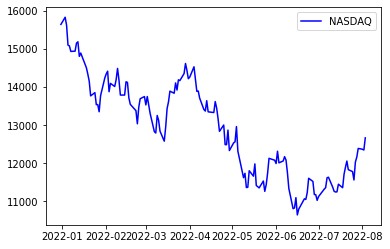

In [8]:
# 그래프 그리기
plt.plot(nasdaq.index, nasdaq.Close, 'b', label='NASDAQ')
plt.legend(loc='best')
plt.show()

### 일간 변동률

In [9]:
# 일간 변동률 (data percentage change)
nasdaq_dpc = (nasdaq['Close'] / nasdaq['Close'].shift(1)-1)*100
nasdaq_dpc.head(10)

Date
2021-12-31         NaN
2022-01-03    1.200578
2022-01-04   -1.326866
2022-01-05   -3.344807
2022-01-06   -0.127877
2022-01-07   -0.961218
2022-01-10    0.046396
2022-01-11    1.409506
2022-01-12    0.230571
2022-01-13   -2.512314
Name: Close, dtype: float64

In [10]:
# 첫 번째 데이터 NaN -> 0
nasdaq_dpc.iloc[0] = 0

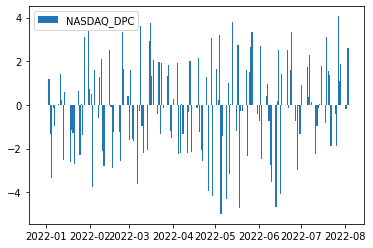

In [11]:
plt.bar(nasdaq_dpc.index,nasdaq_dpc, label='NASDAQ_DPC')
plt.legend(loc='best')
plt.show()

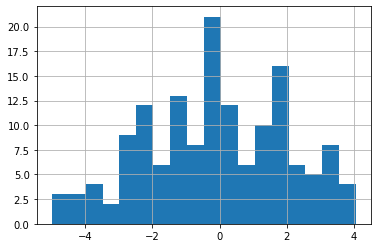

In [12]:
# 일간 변동률 분포 확인
# bins 는 x 축 구간 개수
plt.hist(nasdaq_dpc, bins=18)
plt.grid(True) # 격자 생성
plt.show()

In [13]:
# 일간 변동률 누적합 구하기
nasdaq_dpc_cs = nasdaq_dpc.cumsum()
nasdaq_dpc_cs[-1]

-17.821906926366967

## 나스닥 시간별 데이터 불러오기

### 1분 단위

In [14]:
#1분 단위
nasdaq = yf.download(tickers='^IXIC', period='7d', interval='1m')
nasdaq.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-26 09:30:00-04:00,11709.730469,11709.730469,11702.061523,11702.739258,11702.739258,0
2022-07-26 09:31:00-04:00,11701.880859,11701.880859,11679.505859,11694.527344,11694.527344,22936395
2022-07-26 09:32:00-04:00,11694.821289,11694.821289,11672.938477,11675.917969,11675.917969,20631126
2022-07-26 09:33:00-04:00,11668.676758,11670.966797,11662.475586,11664.377930,11664.377930,19174035
2022-07-26 09:34:00-04:00,11663.030273,11666.687500,11657.080078,11657.080078,11657.080078,20117439
2022-07-26 09:35:00-04:00,11647.515625,11661.674805,11644.391602,11659.262695,11659.262695,20910289
2022-07-26 09:36:00-04:00,11657.820312,11661.752930,11649.443359,11653.544922,11653.544922,18865141
2022-07-26 09:37:00-04:00,11654.542969,11663.792969,11654.542969,11660.384766,11660.384766,18279373
2022-07-26 09:38:00-04:00,11658.995117,11669.192383,11658.995117,11660.615234,11660.615234,17484932


In [15]:
start = datetime(2022, 7, 22, 9, 30, 0)
end = datetime(2022, 7, 22, 12, 31, 0)
nasdaq722 = nasdaq[start: end]
nasdaq722[1:]

C:\Users\JUNGSU~1\AppData\Local\Temp/ipykernel_15872/2759730534.py:3: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  nasdaq722 = nasdaq[start: end]


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,


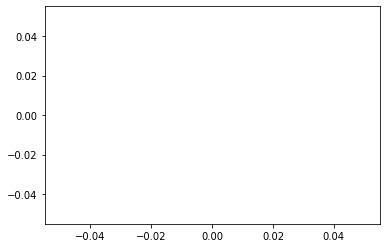

In [16]:
plt.plot(nasdaq722.index, nasdaq722['Close'], 'b', label='nasdaq722')

### 5분 단위

In [17]:
#5분 단위
nasdaq = yf.download(tickers='^IXIC', period='7d', interval='5m')
nasdaq.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-26 09:30:00-04:00,11709.730469,11709.730469,11657.080078,11657.080078,11657.080078,0
2022-07-26 09:35:00-04:00,11647.515625,11669.192383,11644.391602,11665.792969,11665.792969,95270229
2022-07-26 09:40:00-04:00,11667.491211,11676.458984,11652.702148,11656.274414,11656.274414,80864233
2022-07-26 09:45:00-04:00,11650.704102,11650.704102,11631.720703,11644.848633,11644.848633,80246538
2022-07-26 09:50:00-04:00,11648.631836,11669.672852,11648.631836,11662.562500,11662.562500,74294682


In [18]:
start = datetime(2022, 7, 22, 9, 30, 0)
end = datetime(2022, 7, 22, 12, 31, 0)
nasdaq722 = nasdaq[start: end]
nasdaq722.head(5)

C:\Users\JUNGSU~1\AppData\Local\Temp/ipykernel_15872/3884773329.py:3: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  nasdaq722 = nasdaq[start: end]


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,


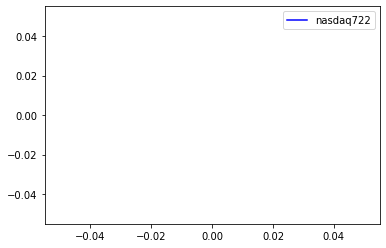

In [19]:
plt.plot(nasdaq722.index, nasdaq722['Close'], 'b', label='nasdaq722')
plt.legend(loc='best')

### 10분 단위

In [20]:
nasdaq722 = nasdaq722[0::2]
nasdaq722.head(10)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,


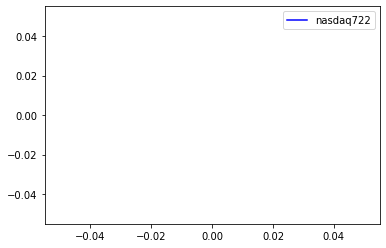

In [21]:
plt.plot(nasdaq722.index, nasdaq722['Close'], 'b', label='nasdaq722')
plt.legend(loc='best')

In [22]:
# 10분간 변동률 체크
# 분간 변동률 (minute percentage change)
nasdaq_mpc = (nasdaq722['Close'] / nasdaq722['Close'].shift(1)-1)*100
nasdaq_mpc.head(10)

Series([], Name: Close, dtype: float64)

In [23]:
nasdaq_mpc[0] = 0
plt.hist(nasdaq_mpc, bins = 20)

IndexError: index 0 is out of bounds for axis 0 with size 0

### 엑셀 데이터 불러오기

In [ ]:
nasdaq_0702 = pd.read_csv('./YfinanceData/nasdaq_2022-07-01.csv')
nasdaq_0702

### 현재가 확인

In [24]:
now_price = yf.Ticker('TQQQ').history(period='1d', interval='1m').iloc[-1][['Open', 'Close']]
price

NameError: name 'price' is not defined

In [25]:
now_price = price.iloc[-1]
now_price

NameError: name 'price' is not defined

In [26]:
help('yfinance')

Help on package yfinance:

NAME
    yfinance

DESCRIPTION
    # -*- coding: utf-8 -*-
    #
    # yfinance - market data downloader
    # https://github.com/ranaroussi/yfinance
    #
    # Copyright 2017-2019 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    #

PACKAGE CONTENTS
    base
    multi
    shared
    ticker
    tickers
    utils
    version

CLASSES
    builtins.object
        yfinance.tickers.Tickers
    yfinance.base.Ticker

In [29]:
df = pd.read_csv('./YfinanceData/1d/tqqq.csv')
time_now = datetime.now()
lastday = datetime.now()-timedelta(days=1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-05,40.500000,40.509998,34.520000,35.860001,35.860001,227776300
1,2022-05-06,35.090000,36.529999,33.099998,34.610001,34.610001,233397200
2,2022-05-09,32.560001,33.419998,30.010000,30.520000,30.520000,210209900
3,2022-05-10,32.720001,33.080002,30.280001,31.570000,31.570000,231789800
4,2022-05-11,30.850000,32.599998,28.469999,28.760000,28.760000,264765900
...,...,...,...,...,...,...,...
57,2022-07-28,30.680000,31.820000,29.520000,31.620001,31.620001,162035900
58,2022-07-29,32.130001,33.650002,31.670000,33.360001,33.360001,146073200
59,2022-08-01,32.779999,34.419998,32.439999,33.310001,33.310001,142641500
60,2022-08-02,32.540001,34.349998,32.209999,33.000000,33.000000,162687500


In [3]:
df2 = yf.Ticker('TQQQ').history(period='90d') 
df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-28,56.919998,59.610001,56.330002,59.520000,91703700,0,0
2022-03-29,61.520000,62.959999,60.139999,62.570000,102006700,0,0
2022-03-30,61.680000,62.540001,59.799999,60.689999,83909400,0,0
2022-03-31,60.639999,60.830002,57.900002,58.180000,84049400,0,0
2022-04-01,58.430000,58.820000,56.400002,57.930000,88081300,0,0
...,...,...,...,...,...,...,...
2022-07-29,32.130001,33.650002,31.670000,33.360001,146073200,0,0
2022-08-01,32.779999,34.419998,32.439999,33.310001,142641500,0,0
2022-08-02,32.540001,34.349998,32.209999,33.000000,162687500,0,0


In [6]:
df2['Close'].rolling(window=20).mean()

Date
2022-03-28         NaN
2022-03-29         NaN
2022-03-30         NaN
2022-03-31         NaN
2022-04-01         NaN
                ...   
2022-07-29    27.90350
2022-08-01    28.34950
2022-08-02    28.71700
2022-08-03    29.19200
2022-08-04    29.60151
Name: Close, Length: 90, dtype: float64

In [7]:
df3 = yf.Ticker('TQQQ').history(period='1d')
df3

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-04,33.549999,36.0,35.450001,35.639999,14026935,0,0


In [12]:
t_time = datetime.now().minute
t_time%10

9